Introduction
============

In most presentations of Riemannian geometry, e.g. @o1983semi and
[Wikipedia](https://en.wikipedia.org/wiki/Fundamental_theorem_of_Riemannian_geometry),
the fundamental theorem of Riemannian geometry ("the miracle of
Riemannian geometry") is given: that for any semi-Riemannian manifold
there is a unique torsion-free metric connection. I assume partly
because of this and partly because the major application of Riemannian
geometry is General Relativity, connections with torsion are given
little if any attention.

It turns out we are all very familiar with a connection with torsion:
the Mercator projection. Some mathematical physics texts,
e.g. @Nakahara2003, allude to this but leave the details to the
reader. Moreover, this connection respects the metric induced from
Euclidean space.

We use [SageManifolds](http://sagemanifolds.obspm.fr) to assist with
the calculations. We hint at how this might be done more slickly in
[Haskell](https://www.haskell.org).

Colophon
--------

This is written as an [Jupyter](http://jupyter.org) notebook. In
theory, it should be possible to run it assuming you have installed at
least sage and Haskell. To publish it, I used

    jupyter-nbconvert --to markdown Mercator.ipynb
    pandoc -s Mercator.md -t markdown+lhs -o Mercator.lhs \
           --filter pandoc-citeproc --bibliography DiffGeom.bib
    BlogLiteratelyD --wplatex Mercator.lhs > Mercator.html

Not brilliant but good enough.

A Cartographic Aside
--------------------

In [1]:
%matplotlib inline

/Applications/SageMath/local/lib/python2.7/site-packages/traitlets/traitlets.py:770: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new @observe(change) API
  clsname, change_or_name), DeprecationWarning)


In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

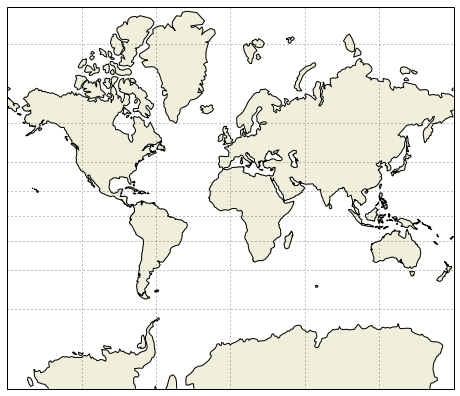

In [4]:
plt.figure(figsize=(8, 8))

ax = plt.axes(projection=cartopy.crs.Mercator())

ax.gridlines()

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.COASTLINE)

plt.show()

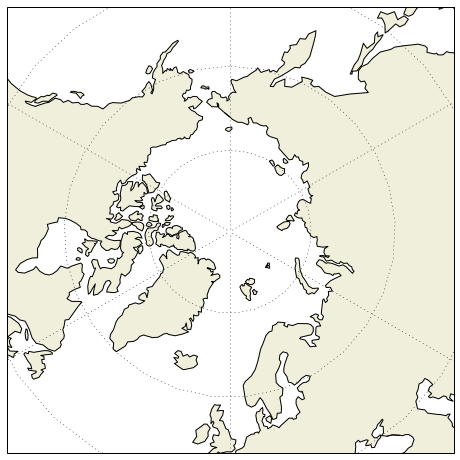

In [5]:
plt.figure(figsize=(8, 8))

bx = plt.axes(projection=cartopy.crs.NorthPolarStereo())

bx.set_extent([-180, 180, 90, 50], ccrs.PlateCarree())

bx.gridlines()

bx.add_feature(cartopy.feature.LAND)
bx.add_feature(cartopy.feature.COASTLINE)

plt.show()

Colophon
--------

This is written as an [Jupyter](http://jupyter.org) notebook. In
theory, it should be possible to run it assuming you have installed at
least sage and Haskell. To publish it, I used

    jupyter-nbconvert --to markdown Mercator.ipynb
    pandoc -s Mercator.md -t markdown+lhs -o Mercator.lhs \
           --filter pandoc-citeproc --bibliography DiffGeom.bib
    BlogLiteratelyD --wplatex Mercator.lhs > Mercator.html

Not brilliant but good enough.

Some commands to `jupyter` to display things nicely.

In [6]:
%display latex

In [7]:
viewer3D = 'tachyon'

Warming Up With SageManifolds
=============================

Let us try a simple exercise: finding the connection coefficients of
the Levi-Civita connection for the Euclidean metric on $\mathbb{R}^2$
in polar co-ordinates.

Define the manifold.

In [8]:
N = Manifold(2, 'N',r'\mathcal{N}', start_index=1)

Define a chart and frame with Cartesian co-ordinates.

In [9]:
ChartCartesianN.<x,y> = N.chart()

In [10]:
FrameCartesianN = ChartCartesianN.frame()

Define a chart and frame with polar co-ordinates.

In [11]:
ChartPolarN.<r,theta> = N.chart()

In [12]:
FramePolarN = ChartPolarN.frame()

The standard transformation from Cartesian to polar co-ordinates.

In [13]:
cartesianToPolar = ChartCartesianN.transition_map(ChartPolarN, (sqrt(x^2 + y^2), arctan(y/x)))

In [14]:
print(cartesianToPolar)

Change of coordinates from Chart (N, (x, y)) to Chart (N, (r, theta))


In [15]:
print(latex(cartesianToPolar.display()))

\left\{\begin{array}{lcl} r & = & \sqrt{x^{2} + y^{2}} \\ \theta & = & \arctan\left(\frac{y}{x}\right) \end{array}\right.


In [16]:
cartesianToPolar.set_inverse(r * cos(theta), r * sin(theta))

Check of the inverse coordinate transformation:
   x == x
   y == y
   r == abs(r)
   theta == arctan(sin(theta)/cos(theta))


Now we define the metric to make the manifold Euclidean.

In [17]:
g_e = N.metric('g_e')

In [18]:
g_e[1,1], g_e[2,2] = 1, 1

We can display this in Cartesian co-ordinates.

In [19]:
print(latex(g_e.display(FrameCartesianN)))

g_e = \mathrm{d} x\otimes \mathrm{d} x+\mathrm{d} y\otimes \mathrm{d} y


And we can display it in polar co-ordinates

In [20]:
print(latex(g_e.display(FramePolarN)))

g_e = \mathrm{d} r\otimes \mathrm{d} r + \left( x^{2} + y^{2} \right) \mathrm{d} \theta\otimes \mathrm{d} \theta


Next let us compute the Levi-Civita connection from this metric.

In [21]:
nab_e = g_e.connection()


In [22]:
print(latex(nab_e))


\nabla_{g_e}


If we use Cartesian co-ordinates, we expect that $\Gamma^k_{ij} = 0,
\forall i,j,k$. Only non-zero entries get printed.

In [23]:
print(latex(nab_e.display(FrameCartesianN)))

Just to be sure, we can print out all the entries.

In [24]:
print(latex(nab_e[:]))

\left[\left[\left[0, 0\right], \left[0, 0\right]\right], \left[\left[0, 0\right], \left[0, 0\right]\right]\right]


In polar co-ordinates, we get

In [25]:
print(latex(nab_e.display(FramePolarN)))

\begin{array}{lcl} \Gamma_{ \phantom{\, r } \, \theta \, \theta }^{ \, r \phantom{\, \theta } \phantom{\, \theta } } & = & -\sqrt{x^{2} + y^{2}} \\ \Gamma_{ \phantom{\, \theta } \, r \, \theta }^{ \, \theta \phantom{\, r } \phantom{\, \theta } } & = & \frac{1}{\sqrt{x^{2} + y^{2}}} \\ \Gamma_{ \phantom{\, \theta } \, \theta \, r }^{ \, \theta \phantom{\, \theta } \phantom{\, r } } & = & \frac{1}{\sqrt{x^{2} + y^{2}}} \end{array}


Which we can rew-rewrite as

$$
\begin{aligned}
\Gamma^r_{\theta,\theta} &= -r \\
\Gamma^\theta_{r,\theta} &= 1/r \\
\Gamma^\theta_{\theta,r} &= 1/r
\end{aligned}
$$

with all other entries being 0.

The Sphere
==========

We define a 2 dimensional manifold. We call it the 2-dimensional
(unit) sphere but it we are going to remove a meridian to allow us to define
the desired connection with torsion on it.

In [26]:
S2 = Manifold(2, 'S^2', latex_name=r'\mathbb{S}^2', start_index=1)

In [28]:
print(latex(S2))

\mathbb{S}^2


To start off with we cover the manifold with two charts.

In [30]:
polar.<th,ph> = S2.chart(r'th:(0,pi):\theta ph:(0,2*pi):\phi'); print(latex(polar))

\left(\mathbb{S}^2,({\theta}, {\phi})\right)


In [31]:
mercator.<xi,ze> = S2.chart(r'xi:(-oo,oo):\xi ze:(0,2*pi):\zeta'); print(latex(mercator))

\left(\mathbb{S}^2,({\xi}, {\zeta})\right)


We can now check that we have two charts.

In [33]:
print(latex(S2.atlas()))

\left[\left(\mathbb{S}^2,({\theta}, {\phi})\right), \left(\mathbb{S}^2,({\xi}, {\zeta})\right)\right]


We can then define co-ordinate frames.

In [35]:
epolar = polar.frame(); print(latex(epolar))

\left(\mathbb{S}^2 ,\left(\frac{\partial}{\partial {\theta} },\frac{\partial}{\partial {\phi} }\right)\right)


In [36]:
emercator = mercator.frame(); print(latex(emercator))

\left(\mathbb{S}^2 ,\left(\frac{\partial}{\partial {\xi} },\frac{\partial}{\partial {\zeta} }\right)\right)


And define a transition map and its inverse from one frame to the other checking that they really are inverses.

In [37]:
xy_to_uv = polar.transition_map(mercator, (log(tan(th/2)), ph))

In [38]:
xy_to_uv.set_inverse(2*arctan(exp(xi)), ze)

Check of the inverse coordinate transformation:
   th == 2*arctan(sin(1/2*th)/cos(1/2*th))
   ph == ph
   xi == xi
   ze == ze


We can define the metric which is the pullback of the Euclidean metric on $\mathbb{R}^3$.

In [39]:
g = S2.metric('g')

In [40]:
g[1,1], g[2,2] = 1, (sin(th))^2

And then calculate the Levi-Civita connection defined by it.

In [41]:
nab_g = g.connection()

In [42]:
print(latex(nab_g.display()))

\begin{array}{lcl} \Gamma_{ \phantom{\, {\theta} } \, {\phi} \, {\phi} }^{ \, {\theta} \phantom{\, {\phi} } \phantom{\, {\phi} } } & = & -\cos\left({\theta}\right) \sin\left({\theta}\right) \\ \Gamma_{ \phantom{\, {\phi} } \, {\theta} \, {\phi} }^{ \, {\phi} \phantom{\, {\theta} } \phantom{\, {\phi} } } & = & \frac{\cos\left({\theta}\right)}{\sin\left({\theta}\right)} \\ \Gamma_{ \phantom{\, {\phi} } \, {\phi} \, {\theta} }^{ \, {\phi} \phantom{\, {\phi} } \phantom{\, {\theta} } } & = & \frac{\cos\left({\theta}\right)}{\sin\left({\theta}\right)} \end{array}


We know the [geodesics](https://en.wikipedia.org/wiki/Geodesic) defined by this connection are the great circles.

We can check that this connection respects the metric.

In [43]:
print(latex(nab_g(g).display()))

\nabla_{g} g = 0


And that it has no torsion.

In [44]:
print(latex(nab_g.torsion().display()))

0


## A New Connection

Let us now define an orthonormal frame.

In [45]:
ch_basis = S2.automorphism_field()
ch_basis[1,1], ch_basis[2,2] = 1, 1/sin(th)

In [46]:
e = S2.default_frame().new_frame(ch_basis, 'e')

In [48]:
print(latex(e))

\left(\mathbb{S}^2, \left(e_1,e_2\right)\right)


We can calculate the dual 1-forms.

In [50]:
dX = S2.coframes()[2] ; print(latex(dX))

\left(\mathbb{S}^2, \left(e^1,e^2\right)\right)


In [56]:
print(latex((dX[1], dX[2])))

\left(e^1, e^2\right)


In [58]:
print(latex((dX[1][:], dX[2][:])))

\left(\left[1, 0\right], \left[0, \sin\left({\theta}\right)\right]\right)


In this case it is trivial to check that the frame and coframe really are orthonormal but we let `sage` do it anyway.

In [62]:
print(latex(((dX[1](e[1]).expr(), dX[1](e[2]).expr()), (dX[2](e[1]).expr(), dX[2](e[2]).expr()))))

\left(\left(1, 0\right), \left(0, 1\right)\right)


Let us define two vectors to be parallel if their angles to a given meridian are the same. For this to be true we must have a connection $\nabla$ with $\nabla e_1 = \nabla e_2 = 0$.

In [63]:
nab = S2.affine_connection('nabla', latex_name=r'\nabla')

In [115]:
nab.add_coef(e); print(latex(nab))

\nabla


Displaying the connection only gives the non-zero components.

In [65]:
print(latex(nab.display(e)))

For safety, let us check all the components explicitly.

In [66]:
print(latex(nab[e,:]))

\left[\left[\left[0, 0\right], \left[0, 0\right]\right], \left[\left[0, 0\right], \left[0, 0\right]\right]\right]


Of course the components are *not* non-zero in other frames.

In [67]:
print(latex(nab.display(epolar)))

\begin{array}{lcl} \Gamma_{ \phantom{\, {\phi} } \, {\phi} \, {\theta} }^{ \, {\phi} \phantom{\, {\phi} } \phantom{\, {\theta} } } & = & \frac{\cos\left({\theta}\right)}{\sin\left({\theta}\right)} \end{array}


In [68]:
print(latex(nab.display(emercator)))

\begin{array}{lcl} \Gamma_{ \phantom{\, {\xi} } \, {\xi} \, {\xi} }^{ \, {\xi} \phantom{\, {\xi} } \phantom{\, {\xi} } } & = & 2 \, \cos\left(\frac{1}{2} \, {\theta}\right)^{2} - 1 \\ \Gamma_{ \phantom{\, {\zeta} } \, {\zeta} \, {\xi} }^{ \, {\zeta} \phantom{\, {\zeta} } \phantom{\, {\xi} } } & = & \frac{2 \, \cos\left(\frac{1}{2} \, {\theta}\right) \cos\left({\theta}\right) \sin\left(\frac{1}{2} \, {\theta}\right)}{\sin\left({\theta}\right)} \end{array}


This connection also respects the metric $g$.

In [69]:
print(latex(nab(g).display()))

\nabla g = 0


Thus, since the Levi-Civita connection is unique, it *must* have torsion.

In [70]:
print(latex(nab.torsion().display(e)))

\frac{\cos\left({\theta}\right)}{\sin\left({\theta}\right)} e_2\otimes e^1\otimes e^2 -\frac{\cos\left({\theta}\right)}{\sin\left({\theta}\right)} e_2\otimes e^2\otimes e^1


The equations for geodesics are
$$
\ddot{\gamma}^k + \Gamma_{ \phantom{\, {k} } \, {i} \, {j} }^{ \, {k} \phantom{\, {i} } \phantom{\, {j} } }\dot{\gamma}^i\dot{\gamma}^j = 0
$$

Explicitly for both variables in the polar co-ordinates chart.

$$
\begin{aligned}
\ddot{\gamma}^\phi & + \frac{\cos\theta}{\sin\theta}\dot{\gamma}^\phi\dot{\gamma}^\theta &= 0 \\
\ddot{\gamma}^\theta & &= 0
\end{aligned}
$$

We can check that $\gamma^\phi(t) = \alpha\log\tan t/2$ and $\gamma^\theta(t) = t$ are solutions although `sage` needs a bit of prompting to help it.

In [71]:
t = var('t'); a = var('a')

In [73]:
print(latex(diff(a * log(tan(t/2)),t).simplify_full()))

\frac{a}{2 \, \cos\left(\frac{1}{2} \, t\right) \sin\left(\frac{1}{2} \, t\right)}


We can simplify this further by recalling the trignometric identity.

In [74]:
print(latex(sin(2 * t).trig_expand()))

2 \, \cos\left(t\right) \sin\left(t\right)


In [76]:
print(latex(diff (a / sin(t), t)))

-\frac{a \cos\left(t\right)}{\sin\left(t\right)^{2}}


In the mercator co-ordinates chart this is

$$
\begin{aligned}
\gamma^\xi(t) &= \alpha\log\tan t/2 \\ 
\gamma^\zeta(t) &= \log\tan t/2
\end{aligned}
$$

In other words: straight lines.

Reparametersing with $s = \alpha\log\tan t/2$ we obtain

$$
\begin{aligned}
\gamma^\phi(s) &= s \\
\gamma^\theta(s) &= 2\arctan e^\frac{s}{\alpha}
\end{aligned}
$$

Let us draw such a curve.

In [77]:
R.<t> = RealLine() ; print(R)

Real number line R


In [78]:
print(dim(R))

1


In [79]:
c = S2.curve({polar: [2*atan(exp(-t/10)), t]}, (t, -oo, +oo), name='c')

In [80]:
print(latex(c.display()))

\begin{array}{llcl} c:& \RR & \longrightarrow & \mathbb{S}^2 \\ & t & \longmapsto & \left({\theta}, {\phi}\right) = \left(2 \, \arctan\left(e^{\left(-\frac{1}{10} \, t\right)}\right), t\right) \\ & t & \longmapsto & \left({\xi}, {\zeta}\right) = \left(-\frac{1}{10} \, t, t\right) \end{array}


In [116]:
print(latex(c.parent()))

\mathrm{Hom}\left(\RR,\mathbb{S}^2\right)


In [82]:
c.plot(chart=polar, aspect_ratio=0.1)

Graphics object consisting of 1 graphics primitiveimage/pngiVBORw0KGgoAAAANSUhEUgAAAXoAAAGDCAYAAAAlPdtBAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzt3Xd0lFXixvHvDEkIhCSIBMRIEKRYWJpLUEGKlNAS2hqT
IBAU0EV+CigKVljFFXF1FXtZQIEgoBRRiBJAUSkKArK4UhcLLE0Tep/fH3fDGpopM3Nn3nk+5+Ts
YZi885gDz77c9xaXx+PxICIijuW2HUBERHxLRS8i4nAqehERh1PRi4g4nIpeRMThVPQiIg6nohcR
cTgVvYiIw6noRUQcTkUvIuJwKnoREYezXvR9+/a1HUFExNGsFv0PP/zAJZdcYjOCiIjjWS36L774
gmbNmtmMICLieFaL/ssvv6Rp06Y2I4iIOJ7Vos/NzaV8+fI2I4iIOJ61oj9w4AAxMTG2Pl5EJGS4
/HnC1N69e3nxxRdZt24de/bsISIigjJlytCoUSOGDx9ORESEv6KIiIQMv93RT548mWbNmtGoUSOm
T5/OH//4R958801mzZpFXl4ebdu25cSJE/6KIyISMvxS9OPGjWPo0KEsWLCA5ORkAP79739TtWpV
AMaMGcN3333HG2+84Y84IiIhxedFv3z5coYOHcqrr75KfHw8YIZwKlWqdPo9YWFh1KxZk+zsbF/H
EREJOT4v+tGjR5OQkEC3bt1Ov7Zo0SJatWpV4H27d+8mPDzc13FEREKOz4v+888/p0WLFgVeW7hw
YYGi/+GHH9i8efNZ7xMRkZLzyxh9lSpVCvx6z549XHzxxad//be//Y2EhAQyMzP9EUdEJKSE+foD
kpKSWL9+/elf//jjj1SrVu30rz/66CMmTZrE/PnzKVeunK/jiIiEHJ/f0T/99NN8/fXXzJkzB4Cc
nBxuuukmTpw4wd///

It's not totally clear this is curved so let's try with another example.

In [83]:
d = S2.curve({polar: [2*atan(exp(-t)), t]}, (t, -oo, +oo), name='d')

In [84]:
print(latex(d.display()))

\begin{array}{llcl} d:& \RR & \longrightarrow & \mathbb{S}^2 \\ & t & \longmapsto & \left({\theta}, {\phi}\right) = \left(2 \, \arctan\left(e^{\left(-t\right)}\right), t\right) \\ & t & \longmapsto & \left({\xi}, {\zeta}\right) = \left(-t, t\right) \end{array}


In [85]:
d.plot(chart=polar, aspect_ratio=0.2)

Graphics object consisting of 1 graphics primitiveimage/pngiVBORw0KGgoAAAANSUhEUgAAAX4AAAGDCAYAAAAs1ns7AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAIABJREFUeJzt3Xl4VFWexvG3KkUIskRIIEAkGHZB9kUCKPvmQJBpWxNB
AbW7HQW3aXvcHRuXBqfbdoRWxAUUDD50D26toAQCCLKIrEIjoAQEZDUhhEAIufPHMUCEhCyVOlW5
38/z1FNPKrfq/krMe88999xzPI7jOAIAuIbXdgEAgMAi+AHAZQh+AHAZgh8AXIbgBwCXIfgBwGUI
fgBwGYIfAFyG4AcAlyH4AcBlCH4AcBnrwT9u3DjbJQCAq1gN/t27d6t+/fo2SwAA17Ea/MuXL1ev
Xr1slgAArmM1+FesWKGePXvaLAEAXMdq8GdkZOjyyy+3WQIAuI614D9+/Lhq1apla/cA4FqeQK7A
deTIEU2ZMkWbN2/W4cOHFR4ermrVqqlTp056+OGHFR4eHqhSAMC1Atbinz17tnr16qVOnTpp7ty5
6tKli15//XW9//77yszM1MCBA5WXlxeocgDAtQIS/C+//LIefPBBLVy4UMOHD5ck7dq1S40aNZIk
TZo0SVu3btX06dMDUQ4AuFqFB/+qVav04IMP6tVXX1VsbKwk0+VTr169s9v4fD41a9ZMCxYsqOhy
AMD1Kjz4n332WcXFxWnkyJFnX1u8eLH69u1baLtDhw6pSpUqFV0OALhehQf/F198od69exd6bdGi
RYWCf/fu3dq5c+cF2wEA/C8gffwNGjQo9PPhw4cVFRV19uc///nPiouL09ixYwNRDgC4mq+idzB4
8GBt2bLl7M979uxR48aNz/78ySefaNasWZo/f75q1KhR0eUAgOtVeIt/8uTJ+uqrr/Thhx9KklJT
U9WvXz/l5eXpr3/9q

Now it's clear that a *straight* line is curved in polar co-ordinates.

But of course in Mercator co-ordinates, it is a straight line. This explains its popularity with mariners: if you draw a straight line on your chart and follow that bearing or [rhumb line](https://en.wikipedia.org/wiki/Rhumb_line) using a compass you will arrive at the end of the straight line. Of course, it is not the shortest path; great circles are but is much easier to navigate.

In [86]:
c.plot(chart=mercator, aspect_ratio=0.1)

Graphics object consisting of 1 graphics primitiveimage/pngiVBORw0KGgoAAAANSUhEUgAAAXgAAAGGCAYAAABxBZrPAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAFidJREFUeJzt3X1sVfUdx/HPvS1QQagUKkJBxIeqFafoBtX5EBFTMU7M
EKVOlyAdXWZi4sPc/MdZt+hIdH8YmqiRWs0EMeoyIlFMiDrdQNS5EZ8SKA8RY4tl0hZ8QOhvf9TW
Pvc+nHN+v/M771dyQwv3/vK9hPvmcLj3/FLGGCMAgHfStgcAAISDwAOApwg8AHiKwAOApwg8AHiK
wAOApwg8AHiKwAOApwg8AHiKwAOApwg8AHiKwMMLGzZs0IYNG2yPATiFwMMLHR0dKioqsj0G4JRC
2wMAQdi1a5dWr16t9evX67vvvlNNTY3OO+8822MBVhF4xNrhw4dVXV2t7du364orrtA333yjw4cP
65hjjrE9GmAdgUdsGWO0ZMkSffvtt9q6dSunaIB+CDxi649//KN2796tLVu2EHdgECl2dEIcffjh
h5o3b562bt2qiooK2+MATiLwiKWf//znmj59uh555BHbowDOIvCInaamJp1xxhnauXOnZsyYYXsc
wFm8Dx6x88wzz+jiiy8m7sAICDxiZ9OmTZo/f77tMQDnEXjEzkcffaRTTz3V9hiA8wg8Yqejo0NH
jhyxPQbgPAKP2CkrK9Obb75pewzAeQQesXPttdeqsbFRzz//vO1RAKfxNknEzv/+9z9deuml+vDD
D1VZWambb75ZS5Ys0eTJk22PBjiFwCOWOjo69NBDD+nxxx/Xvn37VFBQoJqaGtXX1yuVStkeD3AC
gUesdXZ2auPGjXrggQf0r3/9S2vWrNENN9xgeyzACZyDR6yl02ktXLhQb7zxhmbNmqU9e/bYHglw
BoFHbHV2duo///lPz

In [87]:
d.plot(chart=mercator, aspect_ratio=1.0)

Graphics object consisting of 1 graphics primitiveimage/pngiVBORw0KGgoAAAANSUhEUgAAAXgAAAGGCAYAAABxBZrPAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAPYQAAD2EBqD+naQAAE+9JREFUeJzt3W+slnX9wPHPfTgICXiKPyF/HKF5dIQ9aKW0rKarnQ5T
aSEFZm7oKZo+smXmI8Wa1qZPmj6oKTL3U5wrW26sbCPpz5KZW8W0tXEO6cRcfzA4B1YRcP0eIAic
w+H+f13X93q9tnscxn2++xzgfnNxneu+vrUsy7IAIDk9eQ8AQGcIPECiBB4gUQIPkCiBB0iUwAMk
SuABEiXwAIkSeIBECTxAogQeIFECTxK2bt0aW7duzXsMKBSBJwljY2Mxffr0vMeAQunNewBoh7/8
5S/x6KOPxrPPPhv/+9//YmhoKD70oQ/lPRbkSuAptUOHDsW6deti165d8elPfzr+85//xKFDh+Jd
73pX3qNB7gSe0sqyLNasWRP//e9/48UXX3SKBk4j8JTWt771rXj11Vdjx44d4g4TqNnRiTJ65ZVX
4oorrogXX3wxli1blvc4UEgCTyl97nOfi8WLF8f3vve9vEeBwhJ4SmdkZCQuvfTS2L17d1xwwQV5
jwOF5Tp4SueJJ56Ij3/84+IOZyHwlM62bdvi6quvznsMKDyBp3T+9Kc/xfvf//68x4DCE3hKZ2xs
LA4fPpz3GFB4Ak/pLFq0KH7961/nPQYUnsBTOp/97Gdj8+bN8cMf/jDvUaDQXCZJ6bz11lvxyU9+
Ml555ZVYsWJFfOlLX4o1a9bE3Llz8x4NCkXgKaWxsbF44IEH4gc/+EH8/e9/jylTpsTQ0FA8/PDD
UavV8h4PCkHgKbWjR4/Gc889F/fdd1/89re/jSeffDK+8IUv5D0WFIJz8JRaT09PDA4Oxi9/+ctY
unRpvPbaa3mPBIUh8

We can draw these curves on the sphere itself not just on its charts.

In [88]:
R3 = Manifold(3, 'R^3', r'\mathbb{R}^3', start_index=1)

In [90]:
cart.<X,Y,Z> = R3.chart(); print(latex(cart))

\left(\mathbb{R}^3,(X, Y, Z)\right)


In [91]:
Phi = S2.diff_map(R3, {
    (polar, cart): [sin(th) * cos(ph), sin(th) * sin(ph), cos(th)],
    (mercator, cart): [cos(ze) / cosh(xi), sin(ze) / cosh(xi),
                       sinh(xi) / cosh(xi)]
},
    name='Phi', latex_name=r'\Phi')

We can either plot using polar co-ordinates.

In [92]:
graph_polar = polar.plot(chart=cart, mapping=Phi, nb_values=25, color='blue')


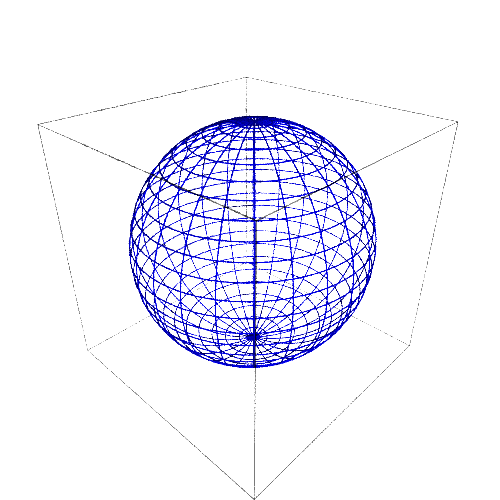

In [93]:
show(graph_polar, viewer=viewer3D)

Or using Mercator co-ordinates. In either case we get the sphere (minus the prime meridian).

In [94]:
graph_mercator = mercator.plot(chart=cart, mapping=Phi, nb_values=25, color='red')

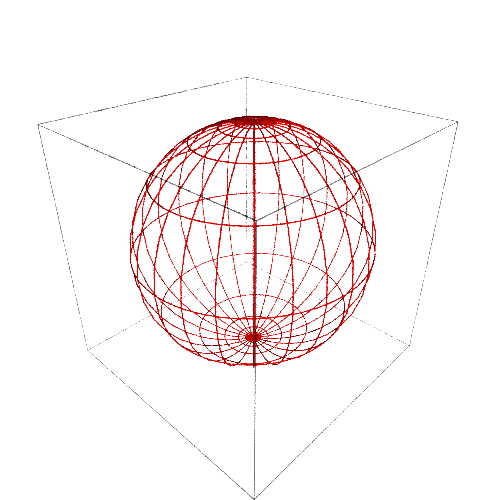

In [95]:
show(graph_mercator, viewer=viewer3D)

We can plot the curve with an angle to the meridian of $\pi/2 - \arctan 1/10$

In [96]:
graph_c = c.plot(mapping=Phi, max_range=40, plot_points=200, thickness=2)

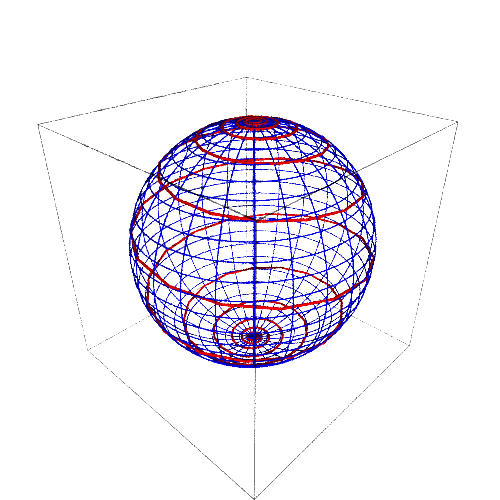

In [97]:
show(graph_polar + graph_c, viewer=viewer3D)

And we can plot the curve at angle of $\pi/4$ to the meridian.

In [98]:
graph_d = d.plot(mapping=Phi, max_range=40, plot_points=200, thickness=2, color="green")

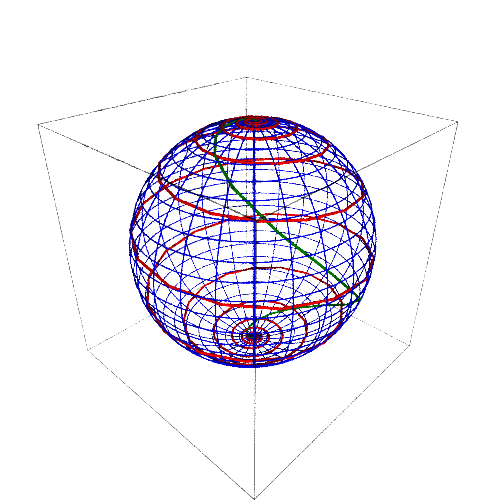

In [99]:
show(graph_polar + graph_c + graph_d, viewer=viewer3D)

# Appendix A: Conformal Equivalence

@Agricola2004 shows that the geodesics of the Levi-Civita connection of a conformally equivalent metric are the geodesics of a connection with vectorial torsion. Let's put some but not all the flesh on the bones.

The **Koszul formula** (see e.g. [@o1983semi]) characterizes the
Levi-Civita connection $\nabla$

$$
\begin{align}
2  \langle \nabla_X Y, Z\rangle & = X  \langle Y,Z\rangle + Y  \langle Z,X\rangle - Z  \langle X,Y\rangle \\
&-  \langle X,[Y,Z]\rangle +   \langle Y,[Z,X]\rangle +  \langle Z,[X,Y]\rangle
\end{align}
$$

Being more explicit about the metric, this can be re-written as

$$
\begin{align}
2 g(\nabla^g_X Y, Z) & = X g(Y,Z) + Y g(Z,X) - Z g(X,Y) \\
&- g(X,[Y,Z]) +  g(Y,[Z,X]) + g(Z,[X,Y])
\end{align}
$$

Let $\nabla^\tilde{g}$ be the Levi-Civita connection for the metric
$\tilde{g} = e^{2\sigma}g$ where $\sigma \in C^\infty M$. Following
[Gadea2010] and substituting into the Koszul formula and then applying
the product rule

$$
\begin{align}
2 e^{2 \sigma} g(\nabla^\tilde{g}_X Y, Z) & = X  e^{2 \sigma} g(Y,Z) + Y e^{2 \sigma} g(Z,X) - Z e^{2 \sigma} g(X,Y) \\
& + e^{2 \sigma} g([X,Y],Z]) - e^{2 \sigma} g([Y,Z],X) + e^{2 \sigma} g([Z,X],Y) \\
& = 2 e^{2\sigma}[g(\nabla^{g}_X Y, Z) + X\sigma g(Y,Z) + Y\sigma g(Z,X) - Z\sigma g(X,Y)] \\
& = 2 e^{2\sigma}[g(\nabla^{g}_X Y + X\sigma Y + Y\sigma X - g(X,Y) \operatorname{grad}\sigma, Z)]
\end{align}
$$

Where as usual the vector field, $\operatorname{grad}\phi$ for $\phi
\in C^\infty M$, is defined via $g(\operatorname{grad}\phi, X) =
\mathrm{d}\phi(X) = X\phi$.

Let's try an example.

In [101]:
nab_tilde = S2.affine_connection('nabla_t', r'\tilde_{\nabla}')

In [102]:
f = S2.scalar_field(-ln(sin(th)), name='f')

In [103]:
for i in S2.irange():
    for j in S2.irange():
        for k in S2.irange():
            nab_tilde.add_coef()[k,i,j] = \
                nab_g(polar.frame()[i])(polar.frame()[j])(polar.coframe()[k]) + \
                polar.frame()[i](f) * polar.frame()[j](polar.coframe()[k]) + \
                polar.frame()[j](f) * polar.frame()[i](polar.coframe()[k]) + \
                g(polar.frame()[i], polar.frame()[j]) * \
                polar.frame()[1](polar.coframe()[k]) * cos(th) / sin(th)


In [104]:
print(latex(nab_tilde.display()))

\begin{array}{lcl} \Gamma_{ \phantom{\, {\theta} } \, {\theta} \, {\theta} }^{ \, {\theta} \phantom{\, {\theta} } \phantom{\, {\theta} } } & = & -\frac{\cos\left({\theta}\right)}{\sin\left({\theta}\right)} \end{array}


In [105]:
print(latex(nab_tilde.torsion().display()))

0


In [106]:
g_tilde = exp(2 * f) * g

In [108]:
print(latex(g_tilde.parent()))

\mathcal{T}^{(0,2)}\left(\mathbb{S}^2\right)


In [110]:
print(latex(g_tilde[:]))

\left(\begin{array}{rr}
\frac{1}{\sin\left({\theta}\right)^{2}} & 0 \\
0 & 1
\end{array}\right)


In [111]:
nab_g_tilde = g_tilde.connection()

In [112]:
print(latex(nab_g_tilde.display()))

\begin{array}{lcl} \Gamma_{ \phantom{\, {\theta} } \, {\theta} \, {\theta} }^{ \, {\theta} \phantom{\, {\theta} } \phantom{\, {\theta} } } & = & -\frac{\cos\left({\theta}\right)}{\sin\left({\theta}\right)} \end{array}


It's not clear (to me at any rate) what the solutions are to the geodesic equations despite the guarantees of @Agricola2004. But let's try a different chart.

In [113]:
print(latex(nab_g_tilde[emercator,:]))

\left[\left[\left[0, 0\right], \left[0, 0\right]\right], \left[\left[0, 0\right], \left[0, 0\right]\right]\right]


In this chart, the geodesics are clearly straight lines as we would hope.

References
==========